In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
assessments = pd.read_csv('assessments.csv')
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [3]:
courses = pd.read_csv('courses.csv')
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [4]:
studentAssessment = pd.read_csv('studentAssessment.csv')
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [5]:
studentInfo = pd.read_csv('studentInfo.csv')
studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [6]:
studentRegistration = pd.read_csv('studentRegistration.csv')
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [7]:
vle = pd.read_csv('vle.csv')
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [8]:
studentVle = pd.read_csv('studentVle.csv')
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [9]:
#group studentAssessment by id_student and reset index

studentAssessment_group = studentAssessment[['id_student','score']].groupby('id_student').agg({'score':['mean','min','max']})
studentAssessment_group.columns = ['mean','min', 'max']
studentAssessment_group = studentAssessment_group.reset_index()

In [10]:
#check for null values within dataframe
studentAssessment_group[['mean','min','max']].isnull().values.any()

True

In [11]:
#fill null values with median, axis = 1 for columns

studentAssessment_group = studentAssessment_group.fillna(studentAssessment_group.median())
studentAssessment_group.isnull().values.any()
studentAssessment_group

,id_student,mean,min,max
0,6516,61.800000,48.0,77.0
1,8462,87.000000,83.0,93.0
2,11391,82.000000,78.0,85.0
3,23629,82.500000,63.0,100.0
4,23698,74.444444,56.0,94.0
...,...,...,...,...
23364,2698251,58.142857,36.0,76.0
23365,2698257,67.800000,58.0,76.0
23366,2698535,39.250000,13.0,62.0
23367,2698577,64.400000,54.0,100.0


In [12]:
studentAssessment_group.to_csv('studentAssessment_group.csv')

In [13]:
#group by code_module, code_presentation, id_student
studentVle_group = studentVle[['code_module', 'code_presentation','id_student','sum_click']].groupby(['code_module', 'code_presentation','id_student']).sum()
studentVle_group

sum_click
code_module code_presentation id_student           
AAA         2013J             11391             934
                              28400            1435
                              30268             281
                              31604            2158
                              32885            1034
...                                             ...
GGG         2014J             2640965            41
                              2645731           893
                              2648187           312
                              2679821           275
                              2684003           616

[29228 rows x 1 columns]

In [14]:
studentVle_group = studentVle_group.reset_index()
studentVle_group

,code_module,code_presentation,id_student,sum_click
0,AAA,2013J,11391,934
1,AAA,2013J,28400,1435
2,AAA,2013J,30268,281
3,AAA,2013J,31604,2158
4,AAA,2013J,32885,1034
...,...,...,...,...
29223,GGG,2014J,2640965,41
29224,GGG,2014J,2645731,893
29225,GGG,2014J,2648187,312
29226,GGG,2014J,2679821,275


In [15]:
#fills missing values with 'Missing'. It is important to specify in place

studentInfo.fillna('Missing', inplace = True)
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [16]:
unique_id = pd.DataFrame(studentInfo['id_student'].unique())
unique_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       28785 non-null  int64
dtypes: int64(1)
memory usage: 225.0 KB


In [17]:
#to drop duplicates, use subset option within method, and not the subset the dataframe

studentInfo = studentInfo.drop_duplicates(subset = 'id_student')
studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [18]:
studentInfo_Vle = pd.merge(studentInfo, studentVle_group, how = 'left', on = ['code_module', 'code_presentation', 'id_student'])
studentInfo_Vle

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,41.0
28781,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,893.0
28782,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,312.0
28783,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,275.0


In [19]:
studentInfo_Vle_Scores = pd.merge(studentInfo_Vle, studentAssessment_group,  how = 'left', on = ['id_student'])
studentInfo_Vle_Scores

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,mean,min,max
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,82.000000,78.0,85.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,66.400000,60.0,70.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0,NaN,NaN,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0,76.000000,71.0,88.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0,54.400000,30.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,41.0,NaN,NaN,NaN
28781,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,893.0,88.111111,72.0,100.0
28782,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,312.0,76.666667,60.0,100.0
28783,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,275.0,91.500000,83.0,100.0


In [20]:
studentInfo_Vle_Scores = studentInfo_Vle_Scores.fillna(studentInfo_Vle_Scores.median())
studentInfo_Vle_Scores

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,mean,min,max
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,82.000000,78.0,85.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,66.400000,60.0,70.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0,76.000000,59.0,94.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0,76.000000,71.0,88.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0,54.400000,30.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,41.0,76.000000,59.0,94.0
28781,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,893.0,88.111111,72.0,100.0
28782,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,312.0,76.666667,60.0,100.0
28783,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,275.0,91.500000,83.0,100.0


In [21]:
studentInfo_Vle_Scores.to_csv('studentInfo_Vle_Scores.csv')

Text(0.5, 1.0, 'Fig 1: No. of Students by Module Code')

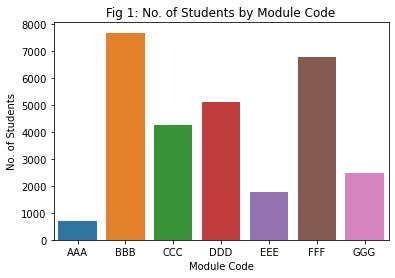

In [22]:
ax = sns.countplot(studentInfo_Vle_Scores['code_module'])
plt.xlabel("Module Code")
plt.ylabel("No. of Students")
plt.title("Fig 1: No. of Students by Module Code")

#plotting number of students by Module Code

Text(0.5, 1.0, 'Fig 2: No. of Students by Gender')

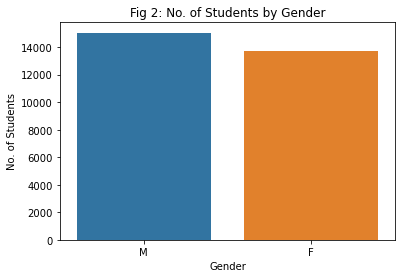

In [23]:
ax = sns.countplot(studentInfo_Vle_Scores['gender'])
plt.xlabel('Gender')
plt.ylabel('No. of Students')
plt.title('Fig 2: No. of Students by Gender')

#plotting number of students by Gender

Text(0.5, 1.0, 'Fig 3: No. of Students by Geographic Region')

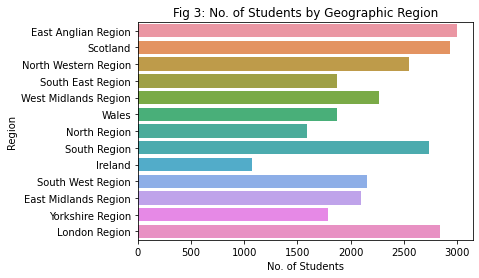

In [119]:
ax = sns.countplot(y = 'region', data = studentInfo_Vle_Scores, orient = 'v')
plt.xlabel('No. of Students')
plt.ylabel('Region')
plt.title('Fig 3: No. of Students by Geographic Region')

#plotting number of students by Geographic Region

[Text(0, 0.5, 'Highest Education Level'),
 Text(0.5, 0, 'No. of Students'),
 Text(0.5, 1.0, 'Fig 4: No. of Students per Education Level')]

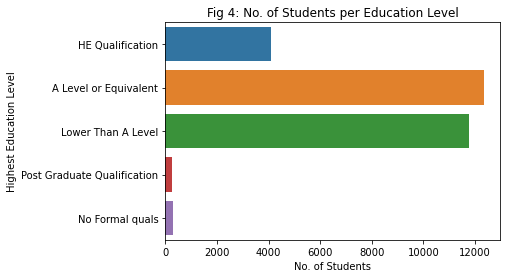

In [25]:
ax = sns.countplot(y = 'highest_education', data = studentInfo_Vle_Scores, orient = 'v')
ax.set(xlabel = 'No. of Students', ylabel = 'Highest Education Level', title = 'Fig 4: No. of Students per Education Level')

[Text(0, 0.5, 'IMD Band'),
 Text(0.5, 0, 'No. of Students'),
 Text(0.5, 1.0, 'Fig 5: No. of Students by IMD Band')]

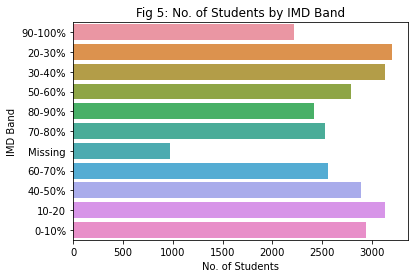

In [118]:
ax = sns.countplot(y = 'imd_band', data = studentInfo_Vle_Scores, orient = 'v')
ax.set(ylabel = 'IMD Band', xlabel = 'No. of Students', title = 'Fig 5: No. of Students by IMD Band')


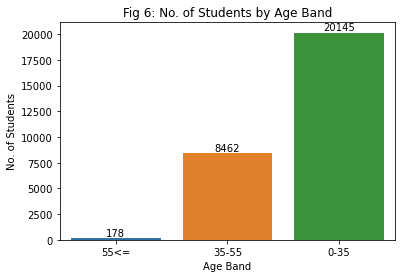

In [27]:
ax = sns.countplot(x = 'age_band', data = studentInfo_Vle_Scores, orient = 'v')
ax.set(xlabel = 'Age Band', ylabel = 'No. of Students', title = 'Fig 6: No. of Students by Age Band')

for p in ax.patches:
    height = p.get_height() #get the height of each bar
    ax.text(x = p.get_x() + (p.get_width()/2),
            y = height + 200,
            s = '{:.0f}'.format(height),
            ha = 'center')

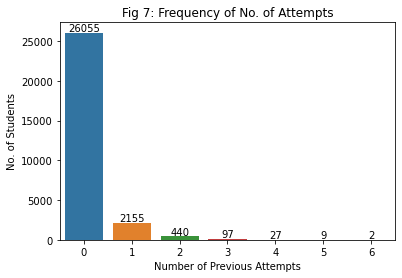

In [28]:
ax6 = sns.countplot(studentInfo_Vle_Scores['num_of_prev_attempts'])
ax6.set(xlabel = 'Number of Previous Attempts', ylabel = 'No. of Students', title = 'Fig 7: Frequency of No. of Attempts')

#label through the list of axes patches
for p in ax6.patches:
    height = p.get_height() #get the height of each bar
    #adding text to each bar
    ax6.text(x = p.get_x() + (p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height + 200, # y-coordinate position of data label, padded 0.2 above bar
            s = '{:.0f}'.format(height), # data label formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center

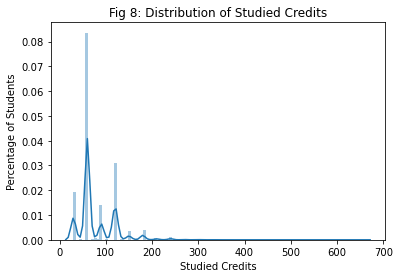

In [29]:
ax = sns.distplot(studentInfo_Vle_Scores['studied_credits'], 
                   bins = 100)

ax.set(xlabel = 'Studied Credits', 
        ylabel = 'Percentage of Students',
        title = 'Fig 8: Distribution of Studied Credits')

#label through the list of axes patches
for p in ax.patches:
    height = p.get_height() #get the height of each bar
    #adding text to each bar
    ax6.text(x = p.get_x() + (p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center

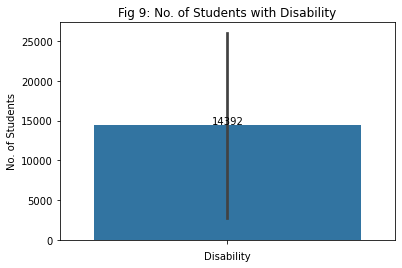

In [31]:
ax = sns.barplot(studentInfo_Vle_Scores['disability'].value_counts(), orient = 'v')

ax.set(xlabel = 'Disability', 
       ylabel = 'No. of Students',
        title = 'Fig 9: No. of Students with Disability')

#label through the list of axes patches
for p in ax.patches:
    height = p.get_height() #get the height of each bar
    #adding text to each bar
    ax.text(x = p.get_x() + (p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height + 200, # y-coordinate position of data label, padded 200 above bar
            s = '{:.0f}'.format(height), # data label formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center

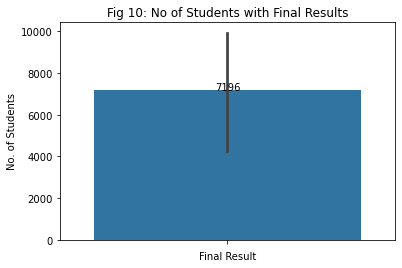

In [33]:
ax = sns.barplot(studentInfo_Vle_Scores['final_result'].value_counts(), orient = 'v')

ax.set(xlabel = 'Final Result', 
       ylabel = 'No. of Students',
       title = 'Fig 10: No of Students with Final Results')

#label through the list of axes patches
for p in ax.patches:
    height = p.get_height() #get the height of each bar
    #adding text to each bar
    ax.text(x = p.get_x() + (p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height, # y-coordinate position of data label, padded 200 above bar
            s = '{:.0f}'.format(height), # data label formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center

[Text(0, 0.5, 'Percentage of Students'),
 Text(0.5, 0, 'Total No. of Clicks'),
 Text(0.5, 1.0, 'Fig 11: Distribution of Total No. of Clicks')]

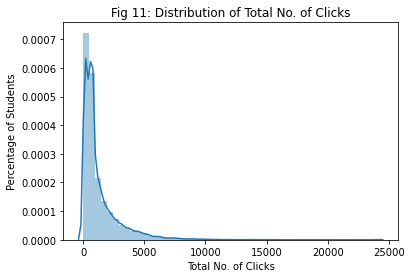

In [34]:
ax = sns.distplot(studentInfo_Vle_Scores['sum_click'])

ax.set(xlabel = 'Total No. of Clicks', 
       ylabel = 'Percentage of Students',
      title = 'Fig 11: Distribution of Total No. of Clicks')

[Text(0, 0.5, 'Percentage of Students'), Text(0.5, 0, 'Mean Score')]

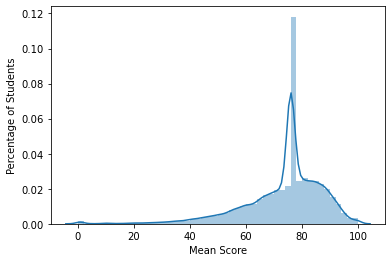

In [35]:
ax11 = sns.distplot(studentInfo_Vle_Scores['mean'])

ax11.set(xlabel = 'Mean Score', 
        ylabel = 'Percentage of Students')

[Text(0, 0.5, 'Percentage of Students'), Text(0.5, 0, 'Max Score')]

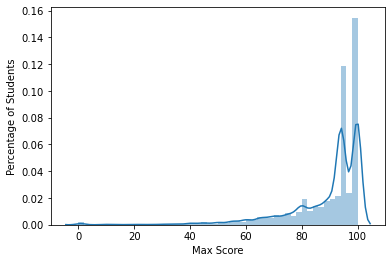

In [36]:
ax12 = sns.distplot(studentInfo_Vle_Scores['max'])

ax12.set(xlabel = 'Max Score', 
        ylabel = 'Percentage of Students')

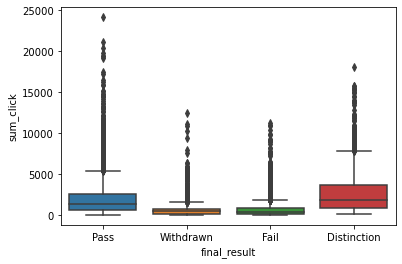

In [37]:
ax13 = sns.boxplot(y = 'sum_click', x = 'final_result', data = studentInfo_Vle_Scores)

for p in ax13.patches:
    height = p.get_height()
    x = p.get_x() + (p.get_width() /2),
    y = height + 200,
    s = '{:.0f}'.format(height),
    ha = 'center'

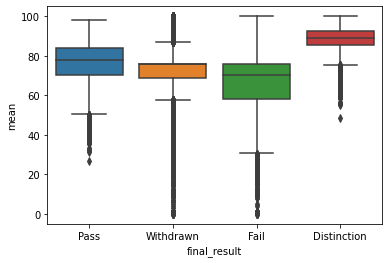

In [38]:
ax14 = sns.boxplot(y = 'mean', x = 'final_result', data = studentInfo_Vle_Scores)

for p in ax14.patches:
    height = p.get_height()
    x = p.get_x() + (p.get_width() /2),
    y = height + 200,
    s = '{:.0f}'.format(height),
    ha = 'center'

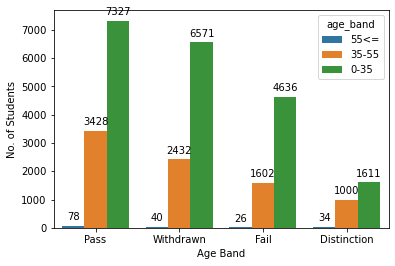

In [39]:
ax15 = sns.countplot(x = 'final_result', data = studentInfo_Vle_Scores, hue = 'age_band')
ax15.set(xlabel = 'Age Band', ylabel = 'No. of Students')

for p in ax15.patches:
    height = p.get_height()
    ax15.text(x = p.get_x() + (p.get_width() /2),
              y = height + 200,
              s = '{:.0f}'.format(height),
              ha = 'center')
    

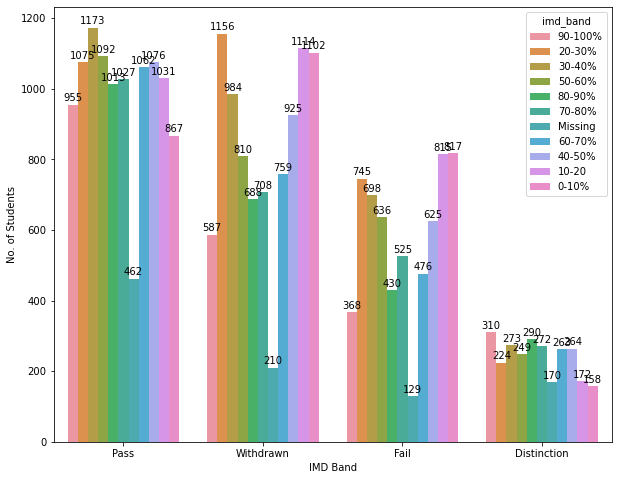

In [40]:
fig, ax16 = plt.subplots(figsize = (10, 8))
sns.countplot(ax = ax16, x = 'final_result', data = studentInfo_Vle_Scores, hue = 'imd_band')
ax16.set(xlabel = 'IMD Band', ylabel = 'No. of Students')

for p in ax16.patches:
    height = p.get_height()
    ax16.text(x = p.get_x() + (p.get_width() /2),
              y = height + 10,
              s = '{:.0f}'.format(height),
              ha = 'center')

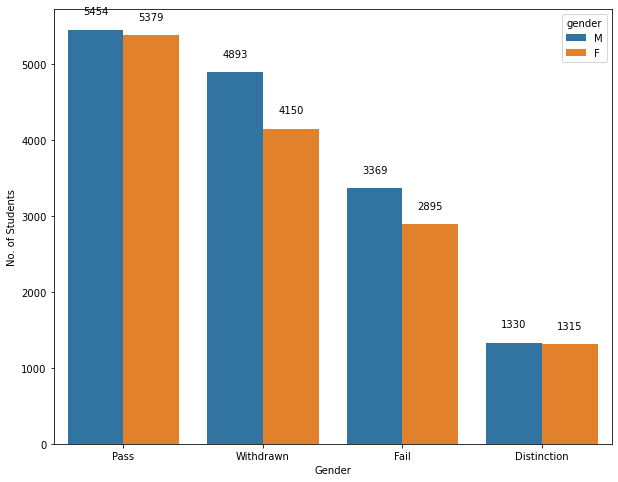

In [41]:
fig, ax17 = plt.subplots(figsize = (10, 8))
sns.countplot(ax = ax17, x = 'final_result', data = studentInfo_Vle_Scores, hue = 'gender')
ax17.set(xlabel = 'Gender', ylabel = 'No. of Students')

for p in ax17.patches:
    height = p.get_height()
    ax17.text(x = p.get_x() + (p.get_width() /2),
              y = height + 200,
              s = '{:.0f}'.format(height),
              ha = 'center')

In [42]:
studentInfo_Vle_Scores['age_band'] = studentInfo_Vle_Scores['age_band'].replace('55<=','55+')
studentInfo_Vle_Scores

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,mean,min,max
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55+,0,240,N,Pass,934.0,82.000000,78.0,85.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,66.400000,60.0,70.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0,76.000000,59.0,94.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0,76.000000,71.0,88.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0,54.400000,30.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,41.0,76.000000,59.0,94.0
28781,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,893.0,88.111111,72.0,100.0
28782,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,312.0,76.666667,60.0,100.0
28783,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,275.0,91.500000,83.0,100.0


In [43]:
code_module_dummy = pd.get_dummies(studentInfo_Vle_Scores['code_module'],prefix = None, drop_first = True)
code_module_dummy

#OneHotEncode module code

,BBB,CCC,DDD,EEE,FFF,GGG
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
28780,0,0,0,0,0,1
28781,0,0,0,0,0,1
28782,0,0,0,0,0,1
28783,0,0,0,0,0,1


In [44]:
code_presentation_dummy = pd.get_dummies(studentInfo_Vle_Scores['code_presentation'],prefix = None, drop_first = True)
code_presentation_dummy

,2013J,2014B,2014J
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
28780,0,0,1
28781,0,0,1
28782,0,0,1
28783,0,0,1


In [45]:
gender_dummy = pd.get_dummies(studentInfo_Vle_Scores['gender'],prefix = None, drop_first = True)
gender_dummy

,M
0,1
1,0
2,0
3,0
4,0
...,...
28780,0
28781,0
28782,0
28783,0


In [46]:
region_dummy = pd.get_dummies(studentInfo_Vle_Scores['region'],prefix = None, drop_first = True)
region_dummy

,East Midlands Region,Ireland,London Region,North Region,North Western Region,Scotland,South East Region,South Region,South West Region,Wales,West Midlands Region,Yorkshire Region
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28780,0,0,0,0,0,0,0,0,0,1,0,0
28781,0,0,0,0,0,0,0,0,0,0,0,0
28782,0,0,0,0,0,0,0,1,0,0,0,0
28783,0,0,0,0,0,0,1,0,0,0,0,0


In [47]:
imd_band_dummy = pd.get_dummies(studentInfo_Vle_Scores['imd_band'],
                                prefix = None, 
                                drop_first = True)
imd_band_dummy

,10-20,20-30%,30-40%,40-50%,50-60%,60-70%,70-80%,80-90%,90-100%,Missing
0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
28780,1,0,0,0,0,0,0,0,0,0
28781,0,0,0,1,0,0,0,0,0,0
28782,0,1,0,0,0,0,0,0,0,0
28783,0,0,0,0,0,0,0,0,1,0


In [48]:
age_band_dummy = pd.get_dummies(studentInfo_Vle_Scores['age_band'],
                                prefix = None, 
                                drop_first = True)
age_band_dummy

,35-55,55+
0,0,1
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
28780,0,0
28781,1,0
28782,0,0
28783,1,0


In [49]:
disability_dummy = pd.get_dummies(studentInfo_Vle_Scores['disability'],
                                prefix = None, 
                                drop_first = True)
disability_dummy

,Y
0,0
1,0
2,1
3,0
4,0
...,...
28780,0
28781,0
28782,1
28783,0


In [50]:
qual_columns = pd.concat([code_module_dummy,
                         code_presentation_dummy,
                         gender_dummy,
                         region_dummy,
                         imd_band_dummy,
                         age_band_dummy,
                         disability_dummy], axis = 1)
qual_columns

,BBB,CCC,DDD,EEE,FFF,GGG,2013J,2014B,2014J,M,...,40-50%,50-60%,60-70%,70-80%,80-90%,90-100%,Missing,35-55,55+,Y
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28781,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
28782,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28783,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [51]:
studentInfo_Vle_Scores['final_result'] = studentInfo_Vle_Scores['final_result'].replace(['Pass', 'Distinction'], 1)
studentInfo_Vle_Scores['final_result'] = studentInfo_Vle_Scores['final_result'].replace(['Withdrawn', 'Fail'], 0)  
studentInfo_Vle_Scores

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,mean,min,max
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55+,0,240,N,1,934.0,82.000000,78.0,85.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1,1435.0,66.400000,60.0,70.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,0,281.0,76.000000,59.0,94.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,1,2158.0,76.000000,71.0,88.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1,1034.0,54.400000,30.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,0,41.0,76.000000,59.0,94.0
28781,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,1,893.0,88.111111,72.0,100.0
28782,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,1,312.0,76.666667,60.0,100.0
28783,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,0,275.0,91.500000,83.0,100.0


In [52]:
quant_columns = studentInfo_Vle_Scores[['num_of_prev_attempts',
                                        'studied_credits',
                                        'sum_click',
                                        'mean',
                                        'max',
                                        'min',
                                        'final_result']]
quant_columns

,num_of_prev_attempts,studied_credits,sum_click,mean,max,min,final_result
0,0,240,934.0,82.000000,85.0,78.0,1
1,0,60,1435.0,66.400000,70.0,60.0,1
2,0,60,281.0,76.000000,94.0,59.0,0
3,0,60,2158.0,76.000000,88.0,71.0,1
4,0,60,1034.0,54.400000,75.0,30.0,1
...,...,...,...,...,...,...,...
28780,0,30,41.0,76.000000,94.0,59.0,0
28781,0,30,893.0,88.111111,100.0,72.0,1
28782,0,30,312.0,76.666667,100.0,60.0,1
28783,0,30,275.0,91.500000,100.0,83.0,0


In [53]:
final_sanitised = pd.concat([qual_columns, quant_columns],
                            axis = 1)
final_sanitised

,BBB,CCC,DDD,EEE,FFF,GGG,2013J,2014B,2014J,M,...,35-55,55+,Y,num_of_prev_attempts,studied_credits,sum_click,mean,max,min,final_result
0,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,240,934.0,82.000000,85.0,78.0,1
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,60,1435.0,66.400000,70.0,60.0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,60,281.0,76.000000,94.0,59.0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,60,2158.0,76.000000,88.0,71.0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,60,1034.0,54.400000,75.0,30.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,30,41.0,76.000000,94.0,59.0,0
28781,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,30,893.0,88.111111,100.0,72.0,1
28782,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,30,312.0,76.666667,100.0,60.0,1
28783,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,30,275.0,91.500000,100.0,83.0,0


In [54]:
final_sanitised.to_csv('final_sanitized.csv')

In [116]:
independent_variable = final_sanitised.drop(columns = 'final_result')
dependent_variable = final_sanitised['final_result']
dependent_variable

0        1
1        1
2        0
3        1
4        1
        ..
28780    0
28781    1
28782    1
28783    0
28784    1
Name: final_result, Length: 28785, dtype: int64

In [117]:
X_train, X_test, y_train, y_test = train_test_split(independent_variable, 
                                                    dependent_variable,
                                                    test_size = 0.2,
                                                    stratify = dependent_variable)

In [57]:
dummy = DummyClassifier()

#instantiating the DummyClassifier model

In [60]:
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
expected = y_test
#fitting the DummyClassifer model to the dataset

score = (y_pred_dummy == expected).sum()
accuracy_score = score/len(expected)
print(accuracy_score)
#calculating the accuracy of the prediction

print(f1_score(y_pred_dummy,
               y_test,
               average = 'macro'))
#calculating the f1_score

0.5032134792426611
0.5011192609847557


In [63]:
dummy_class_confusion = confusion_matrix(y_pred_dummy,
                                         y_test)
dummy_class_confusion

array([[1635, 1434],
       [1426, 1262]])

In [64]:
logistic = LogisticRegression()

In [65]:
logistic.fit(X_train, y_train)
y_pred_logistic = logistic.predict(X_test)
expected = y_test
#fitting the DummyClassifer model to the dataset

score = (y_pred_logistic == expected).sum()
accuracy_score = score/len(expected)
print(accuracy_score)
#calculating the accuracy of the prediction

print(f1_score(y_pred_logistic,
               y_test,
               average = 'macro'))
#calculating the f1_score

0.7826993225638353
0.7807560499414219


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
tree = DecisionTreeClassifier()

In [67]:
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
expected = y_test
#fitting the DummyClassifer model to the dataset

score = (y_pred_tree == expected).sum()
accuracy_score = score/len(expected)
print(accuracy_score)
#calculating the accuracy of the prediction

print(f1_score(y_pred_tree,
               y_test,
               average = 'macro'))
#calculating the f1_score

0.8124022928608651
0.8114506385416104


In [68]:
forest = RandomForestClassifier()

In [69]:
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
expected = y_test
#fitting the DummyClassifer model to the dataset

print(f1_score(y_pred_forest, y_test, average = 'macro'))
#calculating the f1_score

0.860205746322714


In [94]:
gradient = GradientBoostingClassifier()

In [95]:
gradient.fit(X_train, y_train)
y_pred_gradient = gradient.predict(X_test)
expected = y_test
#fitting the DummyClassifer model to the dataset

print(f1_score(y_pred_gradient,
               y_test,
               average = 'macro'))
#calculating the f1_score

0.8558604816232989


In [115]:
gradient_features = gradient.feature_importances_
gradient_features

array([6.97109845e-03, 6.46096855e-03, 2.63109093e-04, 0.00000000e+00,
       2.73159123e-02, 2.47219773e-03, 1.16574260e-03, 8.66825722e-04,
       3.27699091e-03, 1.86434441e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.53857485e-04,
       0.00000000e+00, 1.36039125e-04, 0.00000000e+00, 0.00000000e+00,
       5.51101307e-05, 6.13171090e-05, 5.37863731e-05, 0.00000000e+00,
       8.70766717e-06, 0.00000000e+00, 0.00000000e+00, 6.11234507e-05,
       0.00000000e+00, 6.12393448e-05, 3.10569023e-04, 0.00000000e+00,
       5.93902618e-04, 1.94954791e-05, 3.85657723e-04, 6.50291610e-04,
       7.83485853e-04, 5.69678726e-01, 8.25463758e-02, 2.54455079e-01,
       4.10059567e-02])

In [113]:
feature_importance = pd.DataFrame(independent_variable.columns, columns = ['Features'])
feature_importance['Importance'] = gradient_features
feature_importance = feature_importance.sort_values('Importance', ascending = False)
feature_importance

,Features,Importance
37,sum_click,0.569679
39,max,0.254455
38,mean,0.082546
40,min,0.041006
4,FFF,0.027316
0,BBB,0.006971
1,CCC,0.006461
8,2014J,0.003277
5,GGG,0.002472
6,2013J,0.001166


In [98]:
param_estimator = [100, 250, 500]
param_depth = [2, 3, 4]
param_rate = [0.15, 0.1, 0.05]

#create a list of parameters to iterate through

In [99]:
param_grid = dict(n_estimators = param_estimator, max_depth = param_depth, learning_rate = param_rate)
param_grid

{'n_estimators': [100, 250, 500],
 'max_depth': [2, 3, 4],
 'learning_rate': [0.15, 0.1, 0.05]}

In [91]:
grid = GridSearchCV(gradient,
                    param_grid, 
                    scoring = 'accuracy', 
                    n_jobs = 4,
                    iid = False,
                    cv = 5)
grid.fit(X_test, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.15,
                                                  max_depth=2,
                                                  n_estimators=500),
             iid=False, n_jobs=4,
             param_grid={'learning_rate': [0.15, 0.1, 0.05],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 250, 500]},
             scoring='accuracy')

In [92]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_estimator_.feature_importances_)

0.8603453217009364
{'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 500}
GradientBoostingClassifier(learning_rate=0.15, max_depth=2, n_estimators=500)
[6.96582250e-06 3.06049538e-03 1.27702842e-03 7.37983342e-04
 3.97595690e-02 3.65128509e-03 2.59538675e-03 4.32013069e-04
 6.23861193e-03 3.82882327e-04 5.58678100e-04 1.03530056e-03
 2.04674364e-04 3.76363520e-04 9.76151295e-04 1.33465049e-04
 3.60350707e-04 0.00000000e+00 4.41529731e-04 5.01047457e-04
 5.24733075e-04 3.19328853e-04 6.72170430e-04 1.14599398e-03
 3.12471501e-04 7.40538349e-04 5.48791604e-04 6.02552075e-04
 8.07602212e-05 4.70904741e-04 7.58552861e-04 7.09204313e-04
 9.40681185e-04 4.46346399e-04 1.73398743e-03 2.02226766e-03
 5.21471944e-03 5.38424548e-01 7.80709484e-02 2.58444873e-01
 4.50858443e-02]


In [112]:
feature_importance_cv = pd.DataFrame(independent_variable.columns,
                                     columns = ['Features'])
feature_importance['Importance'] = grid.best_estimator_.feature_importances_
feature_importance = feature_importance.sort_values('Importance', ascending = False)
feature_importance

,index,Features,Importance
27,11,Ireland,0.538425
21,27,60-70%,0.258445
10,31,Missing,0.078071
39,37,sum_click,0.045086
4,4,FFF,0.039760
11,25,40-50%,0.006239
32,32,35-55,0.005215
14,36,studied_credits,0.003651
34,29,80-90%,0.003060
16,14,North Western Region,0.002595
